In [1]:
%run main.py


log_path log.txt

 * Prec@1 91.700, loss 0.2934

step1微调前:  * accuracy 91.70, loss 0.29, pruning 0.29

 * Prec@1 98.400, loss 0.0423

step1微调前:  * accuracy 98.40, loss 0.04, pruning 0.29

 * Prec@1 92.800, loss 0.2630

step1微调前:  * accuracy 92.80, loss 0.26, pruning 0.29

 * Prec@1 97.700, loss 0.0707

step1微调前:  * accuracy 97.70, loss 0.07, pruning 0.30
Gen: 1

 * Prec@1 98.100, loss 0.0444

step1微调前:  * accuracy 98.10, loss 0.04, pruning 0.27

 * Prec@1 97.900, loss 0.0640

step1微调前:  * accuracy 97.90, loss 0.06, pruning 0.31
Gen: 2
step1 final population
 * accuracy 98.40, pruning 0.29
 * accuracy 97.90, pruning 0.31

 * Prec@1 98.400, loss 0.0423

step2微调前:  * accuracy 98.40, loss 0.04, pruning 0.29
Train: * Prec@ 100.000, loss 0.0219
Train: * Prec@ 100.000, loss 0.0186
Train: * Prec@ 99.479, loss 0.0246
Train: * Prec@ 99.609, loss 0.0250
Train: * Prec@ 99.688, loss 0.0221
Train: * Prec@ 99.219, loss 0.0279
Train: * Prec@ 98.661, loss 0.0372
Train: * Prec@ 98.828, loss 0.0356
Train

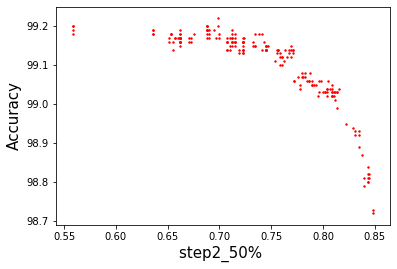

Max accuracy: 99.220, Pruning: 0.6983
Max pruning: 98.730, Accuracy: 0.8483
200


In [4]:
import torch
import pickle
import matplotlib.pyplot as plt
population = pickle.load(open('./Results2/population_100.pkl', 'rb'))
count = 0
    
#function2代表模型正确率
res1 = []
#function1代表模型剪枝率
res2 = []
max_acc = 0
pru = 0
max_pru = 0
acc= 0
for ind in population:
    count += 1
    if max_acc < 100 - ind.obj[0]:
        max_acc = 100 - ind.obj[0]
        pru = 1 - ind.obj[1] / 580
    if max_pru < 1 - ind.obj[1] / 580:
        max_pru = 1 - ind.obj[1] / 580
        acc = 100 - ind.obj[0]
        
    res1.append(100 - ind.obj[0])
    res2.append(1 - ind.obj[1] / 580 )
    
#print('f1:', res1)
#print('f2', res2)
plt.xlabel('step2_50% ', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.scatter(res2, res1, s = 2, c = 'r', marker = 'o')
plt.show()        

print('Max accuracy: {max_acc:.3f}, Pruning: {pru:.4f}'
                 .format(max_acc = max_acc, pru = pru))
print('Max pruning: {acc:.3f}, Accuracy: {max_pru:.4f}'
                 .format(acc = acc, max_pru = max_pru))

print(count)